In [16]:
# parameter
n_mesh = 20  # メッシュ数
n_step = 250  # ステップ数
α = 1  # 熱伝達率
Δt = 0.001  # 時間ステップ
Δx = 1/(n_mesh-1)  # 格子幅
r = α * Δt / Δx^2  # 元の数式を参照
mesh_half_point = Int(trunc((n_mesh + 1)/ 2))  # 初期条件等を考えるとき、奇数の場合は最初の方を多めにする。

# initial condition
u = zeros(Float64, n_mesh)
x_array = []
for j = 1:n_mesh
    x = (j - 1) / (n_mesh - 1)
    push!(x_array, x)
    if j <= mesh_half_point
        u[j] = x
    else
        u[j] = 1 - x
    end
end
u

20-element Vector{Float64}:
 0.0
 0.05263157894736842
 0.10526315789473684
 0.15789473684210525
 0.21052631578947367
 0.2631578947368421
 0.3157894736842105
 0.3684210526315789
 0.42105263157894735
 0.47368421052631576
 0.4736842105263158
 0.42105263157894735
 0.368421052631579
 0.3157894736842105
 0.26315789473684215
 0.21052631578947367
 0.1578947368421053
 0.10526315789473684
 0.052631578947368474
 0.0

In [17]:
# main loop
u_save = []
# initialization
uⁿ⁺¹ = zeros(Float64, n_mesh)

for n = 1:n_step

    # boundary condition
    u[1] = 0.0

    #u[n_mesh] = 0.0  # "Dirichlet-0"
    #u[n_mesh] = 2r * u[n_mesh-1] + (1-2r)*u[n_mesh]  # Neumann-0
    u[n_mesh] = 2r * u[n_mesh-1] + (1-2r)*u[n_mesh] + 2r*Δx  # Neumann-1


    
    # save
    push!(u_save, u)

    for j = 2:n_mesh-1
        uⁿ⁺¹[j] = r*u[j-1] + (1-2r)u[j] + r*u[j+1]
    end

    # next step
    u = copy(uⁿ⁺¹)
    if n==n_step
        push!(u_save, u)
    end

    if abs(u[mesh_half_point]) >= 10000
        print("now is $(n) steps of $(n_step) steps, the calculation is diverge!")
    end
end

In [18]:
u_save

251-element Vector{Any}:
 [0.0, 0.05263157894736842, 0.10526315789473684, 0.15789473684210525, 0.21052631578947367, 0.2631578947368421, 0.3157894736842105, 0.3684210526315789, 0.42105263157894735, 0.47368421052631576, 0.4736842105263158, 0.42105263157894735, 0.368421052631579, 0.3157894736842105, 0.26315789473684215, 0.21052631578947367, 0.1578947368421053, 0.10526315789473684, 0.052631578947368474, 0.07600000000000004]
 [0.0, 0.05263157894736842, 0.10526315789473684, 0.15789473684210525, 0.21052631578947367, 0.2631578947368421, 0.3157894736842105, 0.36842105263157887, 0.42105263157894735, 0.4546842105263158, 0.4546842105263158, 0.42105263157894735, 0.3684210526315789, 0.31578947368421056, 0.2631578947368421, 0.2105263157894737, 0.15789473684210525, 0.10526315789473686, 0.08006757894736845, 0.09580879200000003]
 [0.0, 0.05263157894736842, 0.10526315789473684, 0.15789473684210525, 0.21052631578947367, 0.2631578947368421, 0.3157894736842105, 0.36842105263157887, 0.41419363157894734, 0.44

┌ Info: Saved animation to /Users/smamitsu/Github/Basics_of_fluid_analysis/2_1dimension_heat_conduction_analysis/Julia/anime/heat_e.gif
└ @ Plots /Users/smamitsu/.julia/packages/Plots/QWCV6/src/animation.jl:156


Plots.AnimatedGif("/Users/smamitsu/Github/Basics_of_fluid_analysis/2_1dimension_heat_conduction_analysis/Julia/anime/heat_e.gif")
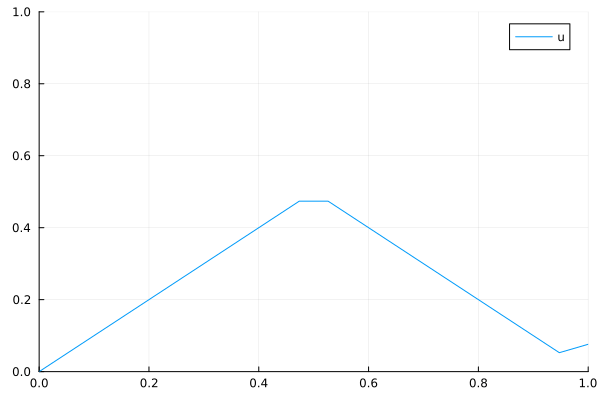

In [20]:
mkpath("anime")
anim = Animation()
for n in 1:n_step
    plt = plot(xlims=(0,1), ylims=(0,1))
    plot!(x_array, u_save[n], label="u")
    frame(anim, plt)
end
gif(anim, "anime/heat_e.gif", fps=20)
